In [1]:
ask_workers = 12

from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=ask_workers,dashboard_address=':8686')
c = Client(cluster)
c

distributed.diskutils - INFO - Found stale lock file and directory '/home/leguilfl/Studies/MASSH_CCS/Notebooks/dask-worker-space/worker-ko85pj66', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/leguilfl/Studies/MASSH_CCS/Notebooks/dask-worker-space/worker-ik3d4ihk', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/leguilfl/Studies/MASSH_CCS/Notebooks/dask-worker-space/worker-ab7kr12l', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/leguilfl/Studies/MASSH_CCS/Notebooks/dask-worker-space/worker-8s5gx106', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/leguilfl/Studies/MASSH_CCS/Notebooks/dask-worker-space/worker-tc0m34mm', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/leguilfl/Studies/MASSH_CCS/Notebooks/dask-worker-space/worker-mw88ccts', purging
distributed.diskutils - INFO - Found stale lock file and directory '/h

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8686/status,
Dashboard: http://127.0.0.1:8686/status,Workers: 12
Total threads: 12,Total memory: 187.53 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39711,Workers: 12
Dashboard: http://127.0.0.1:8686/status,Total threads: 12
Started: Just now,Total memory: 187.53 GiB
Comm: tcp://127.0.0.1:38721,Total threads: 1
Dashboard: http://127.0.0.1:38591/status,Memory: 15.63 GiB
Nanny: tcp://127.0.0.1:35285,


In [2]:
import os 
import xarray as xr
import numpy as np 
import matplotlib.pylab as plt 
import pandas as pd 

In [54]:
dir_rawdata = '/bettik/leguilfl/DATA/MITgcm/Mitgcm_coarse3'
pattern = 'llc4320_2012'

lon_min = 233.2
lon_max = 236.1
lat_min = 32
lat_max = 39.3

t0 = np.datetime64('2012-01-01')
t1 = np.datetime64('2012-12-31T23')

name_region = f'{int(lat_min)}_{int(lat_max)}_{int(lon_min)}_{int(lon_max)}'
print(name_region)

32_39_233_236


In [4]:
ds = xr.open_mfdataset(os.path.join(dir_rawdata,pattern+'*.nc'),combine='by_coords',parallel=True)
ds

<xarray.Dataset>
Dimensions:     (time: 7399, lon: 3600, lat: 1799)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-01 ... 2012-11-04T06:00:00
  * lon         (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * lat         (lat) float64 -89.9 -89.8 -89.7 -89.6 ... 89.6 89.7 89.8 89.9
Data variables:
    ssh         (time, lat, lon) float64 dask.array<chunksize=(1, 1799, 3600), meta=np.ndarray>
    ocean_tide  (time, lat, lon) float32 dask.array<chunksize=(1, 1799, 3600), meta=np.ndarray>
    ice_conc    (time, lat, lon) float32 dask.array<chunksize=(1, 1799, 3600), meta=np.ndarray>
    dac         (time, lat, lon) float32 dask.array<chunksize=(1, 1799, 3600), meta=np.ndarray>

## Time selection

In [6]:
ds_t = ds.sel({'time':slice(t0,t1)})
ds_t

<xarray.Dataset>
Dimensions:     (time: 7399, lon: 3600, lat: 1799)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-01 ... 2012-11-04T06:00:00
  * lon         (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * lat         (lat) float64 -89.9 -89.8 -89.7 -89.6 ... 89.6 89.7 89.8 89.9
Data variables:
    ssh         (time, lat, lon) float64 dask.array<chunksize=(1, 1799, 3600), meta=np.ndarray>
    ocean_tide  (time, lat, lon) float32 dask.array<chunksize=(1, 1799, 3600), meta=np.ndarray>
    ice_conc    (time, lat, lon) float32 dask.array<chunksize=(1, 1799, 3600), meta=np.ndarray>
    dac         (time, lat, lon) float32 dask.array<chunksize=(1, 1799, 3600), meta=np.ndarray>

## Geographical selection

In [56]:
ds_t.coords['lon'] = np.mod(ds_t['lon'], 360)
ds_xy = ds_t.sel({'lon':slice(lon_min,lon_max-1/10),'lat':slice(lat_min,lat_max-1/10)})
ds_xy

<xarray.Dataset>
Dimensions:     (time: 7399, lon: 29, lat: 73)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-01 ... 2012-11-04T06:00:00
  * lon         (lon) float64 233.2 233.3 233.4 233.5 ... 235.8 235.9 236.0
  * lat         (lat) float64 32.0 32.1 32.2 32.3 32.4 ... 38.9 39.0 39.1 39.2
Data variables:
    ssh         (time, lat, lon) float64 dask.array<chunksize=(1, 73, 29), meta=np.ndarray>
    ocean_tide  (time, lat, lon) float32 dask.array<chunksize=(1, 73, 29), meta=np.ndarray>
    ice_conc    (time, lat, lon) float32 dask.array<chunksize=(1, 73, 29), meta=np.ndarray>
    dac         (time, lat, lon) float32 dask.array<chunksize=(1, 73, 29), meta=np.ndarray>

In [11]:
from glob import glob
dir_obs = '/bettik/leguilfl/Studies/MASSH_CCS/data/SWOT/'
files_swot = sorted(glob(dir_obs + '*.nc'))[:2]
obs = xr.open_mfdataset(files_swot,combine='nested',concat_dim='num_lines')
obs

<xarray.Dataset>
Dimensions:          (num_lines: 3416, num_pixels: 71)
Coordinates:
    latitude         (num_lines, num_pixels) float64 dask.array<chunksize=(1708, 71), meta=np.ndarray>
    longitude        (num_lines, num_pixels) float64 dask.array<chunksize=(1708, 71), meta=np.ndarray>
    latitude_nadir   (num_lines) float64 dask.array<chunksize=(1708,), meta=np.ndarray>
    longitude_nadir  (num_lines) float64 dask.array<chunksize=(1708,), meta=np.ndarray>
    x_ax             (num_pixels) float32 dask.array<chunksize=(71,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels
Data variables:
    ssh_karin        (num_lines, num_pixels) float64 dask.array<chunksize=(1708, 71), meta=np.ndarray>
    ssh_karin_true   (num_lines, num_pixels) float64 dask.array<chunksize=(1708, 71), meta=np.ndarray>

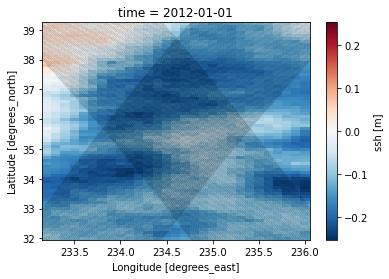

In [57]:
ds_xy.ssh[0,:,:].plot()
plt.scatter(obs.longitude,obs.latitude,c='k',alpha=0.1,s=0.2)
    

## Save to netcdf

In [58]:
ssh_out = ds_xy.ssh

In [59]:
dir_out = os.path.join('/bettik/leguilfl/Studies/MASSH_CCS/data',name_region)
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

In [60]:
def create_filepath(date, prefix='ssh_raw', root_path=dir_out):
    filepath = f'{root_path}/{prefix}_{date}.nc'
    return filepath

frame_per_files = 24
time_save = np.arange(0,ssh_out.shape[0],frame_per_files)
dates = [pd.to_datetime(str(ssh_out.time[t].values)).strftime("%Y-%m-%d") for t in time_save]
paths = [create_filepath(date) for date in dates]

In [61]:
import gc
def create_dataset(t0,path):
    _ssh_out = ssh_out.isel({'time':slice(t0,t0+frame_per_files)})
    _ssh_out.to_netcdf(path)
    
    del _ssh_out
    gc.collect()

    return path

In [62]:
from dask import delayed,compute
delayed_results = []
for t0,path in zip(time_save,paths):
    res = delayed(create_dataset)(t0, path)
    delayed_results.append(res)
results = compute(*delayed_results, scheduler="processes")

distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took